### Conjugate Gradient Algorithm

Assume that the objective function is 
$$
E(x,y)=\frac{1}{2}
\left[\begin{array}{l}x & y\end{array}\right]
A
\left[\begin{array}{l}x \\ y\end{array}\right]
- b^T \left[\begin{array}{l}x \\ y\end{array}\right]
$$

where 

$$
\begin{array}{l}
&A = Q \Lambda Q^T \\
&\Lambda = \left[\begin{array}{ll}
\lambda_1 & 0 \\
0 & \lambda_2
\end{array}\right]\\
&Q = \left[\begin{array}{ll}
cos(\theta) & sin(\theta) \\
-sin(\theta) & cos(\theta)
\end{array}\right]\\
\end{array}
$$

In [105]:
import numpy as np
import math
lambda_1 = 1
lambda_2 = 10
theta =  np.pi/8
Q = np.array([[math.cos(theta), math.sin(theta)],
              [-math.sin(theta), math.cos(theta)]])
Lambda = np.array([[lambda_1, 0],
                  [0, lambda_2]])
A = np.matmul(np.matmul(Q,Lambda), Q.T)
b = np.array([1,2])

In [106]:
xs=np.arange(-4,4,0.1)
ys=np.arange(-4,4,0.1)
E = np.ndarray([len(xs),len(ys)])
for i,x in enumerate (xs):
    for j,y in enumerate(ys):
        p = np.array([x,y])
        E[i,j] = 1/2*np.matmul(np.matmul(p, R), np.transpose(p))\
                - np.matmul(p,b)
X, Y = np.meshgrid(xs, ys)

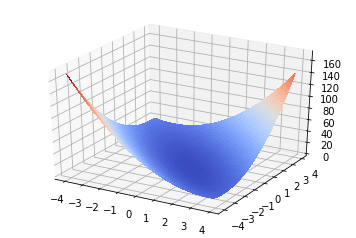

In [107]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, E, \
                       cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

## Minimization using Gradient descent

We have:
    $$\nabla{E}=R \left[\begin{array}{l} x\\ y \end{array}\right] - b$$

### The conjugate gradient algorithm

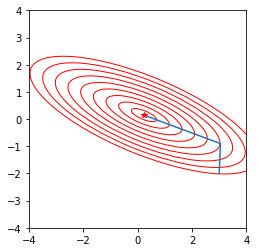

In [104]:
from matplotlib.patches import Ellipse
dim = 2
T = dim + 1
xy = np.zeros([T, dim])
r = np.zeros([T,dim])
p = np.zeros([T,dim])
alpha = np.zeros([T])
beta = np.zeros([T])
x = np.zeros([T])
y = np.zeros([T])

xy[0,0] = 3
xy[0,1] = -2
r[0,:] = A @ xy[0,:] - b
p[0,:] = -r[0,:]
for k in range (T-1):
    x[k] = xy[k,0]
    y[k] = xy[k,1]
    alpha[k] = r[k,:].T @ r[k,:]
    alpha[k] /= p[k,:].T @ A @ p[k,:]
    xy[k+1,:] = xy[k,:] + alpha[k] * p[k,:]
    r[k+1,:] = A @ xy[k+1,:] - b
    beta[k+1] = r[k+1,:].T @ r[k+1,:]
    beta[k+1] /= r[k,:].T @ r[k,:]
    p[k+1,:] = -r[k+1,:] + beta[k+1] * p[k,:]
x[T-1] = xy[T-1,0]
y[T-1] = xy[T-1,1]

x_star = np.linalg.inv(A) @ b
(x0,y0) = x_star
ax = plt.subplot(111, aspect='equal')
for scale in np.arange (10):
    width = scale / np.sqrt(lambda_1)
    height = scale / np.sqrt(lambda_2)
    e = Ellipse((x0, y0), width, height, -theta * 180 / np.pi
           , facecolor = 'none', edgecolor = 'r')
    ax.add_artist(e)

plt.plot(x,y)
plt.plot(x[-1],y[-1], '*r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()